<a href="https://colab.research.google.com/github/guyzamos/MS_prediction/blob/main/mergedMSDBS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import all the relevant libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import io
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


upload the db file

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
dfSecondDB = pd.read_pickle("/content/gdrive/My Drive/Colab Notebooks/MS_Notebooks/DFDB2Final.pkl")
dfFirstDB = pd.read_pickle("/content/gdrive/My Drive/Colab Notebooks/MS_Notebooks/DFDB1Final.pkl")
dfSecondDB = dfSecondDB[['sample_code','diagnosis','TIM3_RQ','TIGIT_RQ','LAG3_RQ','PD-1_RQ','gender','age_at_diagnosis','primary_EDSS_at_diagnosis','1_years_EDSS_from_sample_date','5_years_from_sample','EDSS_post_10_years','oligoclonal_band','MRI_lesion_mass','num_of_medicine_changed','positive_OCB','Male','diagnosis_RRMS']]
dfFirstDB = dfFirstDB[['sample_code','diagnosis','TIM3_RQ','TIGIT_RQ','LAG3_RQ','PD-1_RQ','gender','age_at_diagnosis','primary_EDSS_at_diagnosis','1_years_EDSS_from_sample_date','5_years_from_sample','EDSS_post_10_years','oligoclonal_band','MRI_lesion_mass','num_of_medicine_changed','positive_OCB','Male','diagnosis_RRMS']]
dfSecondDB.to_excel('dfSecondDBAfterFillNA.xlsx',index=False)
dfFirstDB.to_excel('dfFirstDBAfterFillNA.xlsx',index=False)

merged DBS

In [ ]:
dfMerged = pd.concat([dfFirstDB, dfSecondDB])
dfMerged

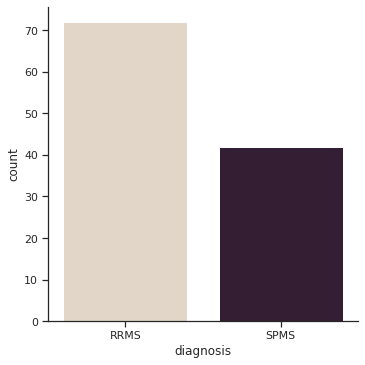

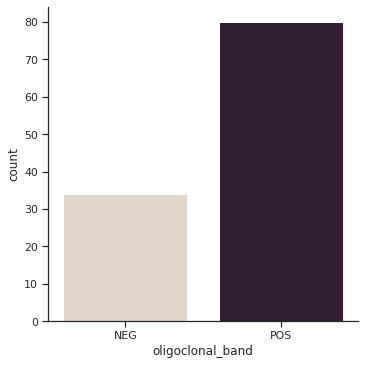

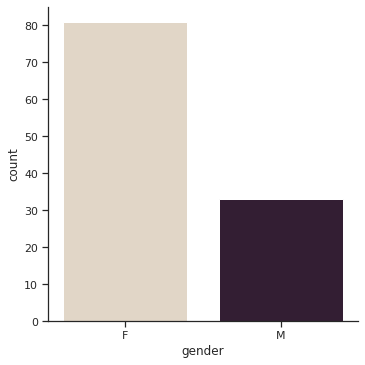

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x="diagnosis", kind="count", palette="ch:.25", data=dfMerged)
sns.catplot(x="oligoclonal_band", kind="count", palette="ch:.25", data=dfMerged)
sns.catplot(x="gender", kind="count", palette="ch:.25", data=dfMerged)

find min and max ranges

In [ ]:
print('age_at_diagnosis')
max_value = dfMerged['age_at_diagnosis'].max() 
print(max_value)
min_value = dfMerged['age_at_diagnosis'].min() 
print(min_value)

print('primary_EDSS_at_diagnosis')
max_value = dfMerged['primary_EDSS_at_diagnosis'].max() 
print(max_value)
min_value = dfMerged['primary_EDSS_at_diagnosis'].min() 
print(min_value)

print('num_of_medicine_changed')
max_value = dfMerged['num_of_medicine_changed'].max() 
print(max_value)
min_value = dfMerged['num_of_medicine_changed'].min() 
print(min_value)

print('TIGIT_RQ')
max_value = dfMerged['TIGIT_RQ'].max() 
print(max_value)
min_value = dfMerged['TIGIT_RQ'].min() 
print(min_value)

print('TIM3_RQ')
max_value = dfMerged['TIM3_RQ'].max() 
print(max_value)
min_value = dfMerged['TIM3_RQ'].min() 
print(min_value)

print('LAG3_RQ')
max_value = dfMerged['LAG3_RQ'].max() 
print(max_value)
min_value = dfMerged['LAG3_RQ'].min() 
print(min_value)

print('PD-1_RQ')
max_value = dfMerged['PD-1_RQ'].max() 
print(max_value)
min_value = dfMerged['PD-1_RQ'].min() 
print(min_value)


print('1_years_EDSS_from_sample_date')
max_value = dfMerged['1_years_EDSS_from_sample_date'].max() 
print(max_value)
min_value = dfMerged['1_years_EDSS_from_sample_date'].min() 
print(min_value)


print('5_years_from_sample')
max_value = dfMerged['5_years_from_sample'].max() 
print(max_value)
min_value = dfMerged['5_years_from_sample'].min() 
print(min_value)

print('EDSS_post_10_years')
max_value = dfMerged['EDSS_post_10_years'].max() 
print(max_value)
min_value = dfMerged['EDSS_post_10_years'].min() 
print(min_value)


print('MRI_lesion_mass')
max_value = dfMerged['MRI_lesion_mass'].max() 
print(max_value)
min_value = dfMerged['MRI_lesion_mass'].min() 
print(min_value)


age_at_diagnosis
67
16
primary_EDSS_at_diagnosis
5.0
0.0
num_of_medicine_changed
6
0
TIGIT_RQ
2.963221522
0.0242324879965762
TIM3_RQ
4.498309339
0.145306643566523
LAG3_RQ
6.850679064
0.0195415818476979
PD-1_RQ
16.7971678906139
0.00718403819961321
1_years_EDSS_from_sample_date
10.0
0.0
5_years_from_sample
10.0
0.0
EDSS_post_10_years
10.0
0.0
MRI_lesion_mass
104776.0
0.0


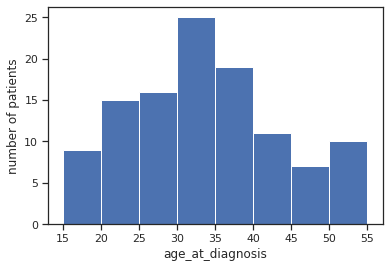

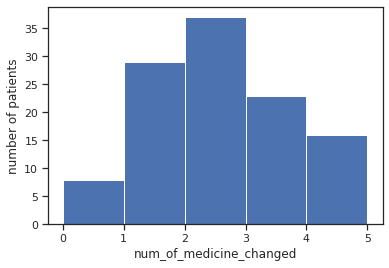

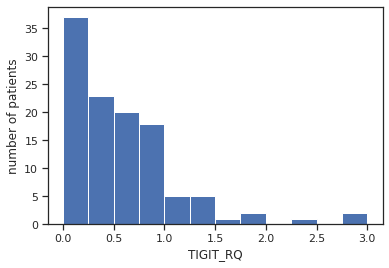

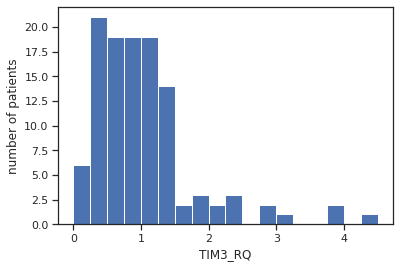

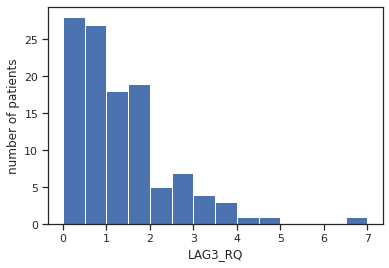

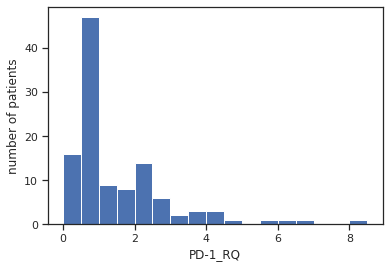

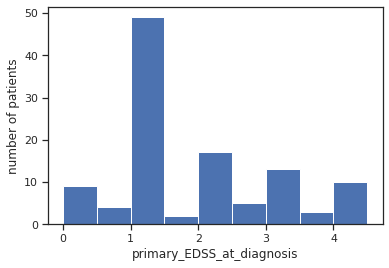

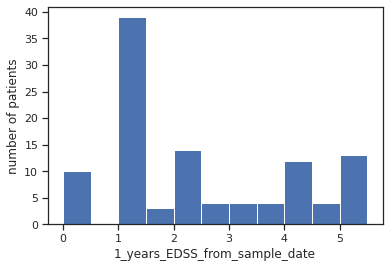

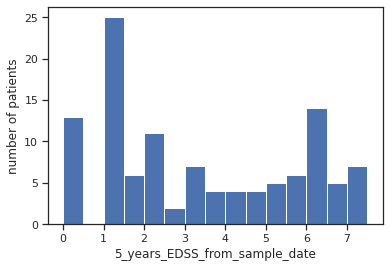

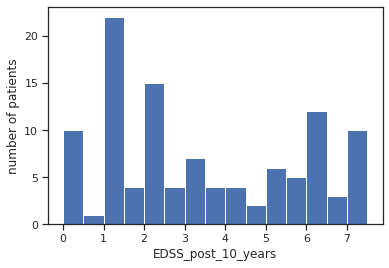

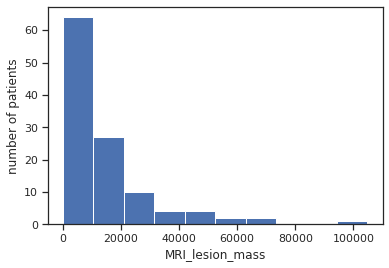

In [ ]:
degrees = dfMerged['age_at_diagnosis']
plt.hist(degrees, bins=[15,20,25,30,35,40,45,50,55])
# plt.title('age')
plt.xlabel('age_at_diagnosis')
plt.ylabel('number of patients')
plt.show()

degrees = dfMerged['num_of_medicine_changed']
plt.hist(degrees, bins=[0,1,2,3,4,5])
# plt.title('num_of_medicine_changed')
plt.xlabel('num_of_medicine_changed')
plt.ylabel('number of patients')
plt.show()


degrees = dfMerged['TIGIT_RQ']
plt.hist(degrees, bins=[0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3])
# plt.title('TIGIT_RQ')
plt.xlabel('TIGIT_RQ')
plt.ylabel('number of patients')
plt.show()


degrees = dfMerged['TIM3_RQ']
plt.hist(degrees, bins=[0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5])
# plt.title('TIM3_RQ')
plt.xlabel('TIM3_RQ')
plt.ylabel('number of patients')
plt.show()


degrees = dfMerged['LAG3_RQ']
plt.hist(degrees, bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7])
# plt.title('LAG3_RQ')
plt.xlabel('LAG3_RQ')
plt.ylabel('number of patients')
plt.show()


degrees = dfMerged['PD-1_RQ']
plt.hist(degrees, bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5])
# plt.title('PD-1_RQ')
plt.xlabel('PD-1_RQ')
plt.ylabel('number of patients')
plt.show()



degrees = dfMerged['primary_EDSS_at_diagnosis']
plt.hist(degrees, bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5])
# plt.title('primary_EDSS_at_diagnosis')
plt.xlabel('primary_EDSS_at_diagnosis')
plt.ylabel('number of patients')
plt.show()


degrees = dfMerged['1_years_EDSS_from_sample_date']
plt.hist(degrees, bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5])
# plt.title('1_years_EDSS_from_sample_date')
plt.xlabel('1_years_EDSS_from_sample_date')
plt.ylabel('number of patients')
plt.show()



degrees = dfMerged['5_years_from_sample']
plt.hist(degrees, bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5])
# plt.title('5_years_EDSS_from_sample_date')
plt.xlabel('5_years_EDSS_from_sample_date')
plt.ylabel('number of patients')
plt.show()


degrees = dfMerged['EDSS_post_10_years']
plt.hist(degrees, bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5])
# plt.title('EDSS_post_10_years')
plt.xlabel('EDSS_post_10_years')
plt.ylabel('number of patients')
plt.show()


degrees = dfMerged['MRI_lesion_mass']
plt.hist(degrees)
# plt.title('MRI_lesion_mass')
plt.xlabel('MRI_lesion_mass')
plt.ylabel('number of patients')
plt.show()

function for calculate cross validation score on one DB

In [ ]:
def calcCrossValidation(model, data, predictors, outcome):

    # Perform k-fold cross-validation with 10 folds
    kf = KFold(n_splits=10)
    accuracy = []
    for train, test in kf.split(data):
        # Filter training data
        train_predictors = (data[predictors].iloc[train, :])
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
        # Record accuracy from each cross-validation run
        accuracy.append(model.score(data[predictors].iloc[test, :], data[outcome].iloc[test]))

    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(accuracy)))
    print(accuracy)

function for calcuate RMSE on one DB only train 

In [ ]:
# def calc_rmse(model, data, predictors, outcome):

#   # Fit the model on training set:
#   model.fit(data[predictors], data[outcome])
#   # Make predictions on training set:
#   y_predicted = model.predict(data[predictors])
#   rmse = sqrt(mean_squared_error(data[outcome], y_predicted))  
#   print(rmse)

In [ ]:
def calc_rmse(model, data, predictors, outcome):
  df_label = data[outcome]
  df_predictors = data[predictors]
  X_train, X_test, y_train, y_test = train_test_split(df_predictors, df_label)
  # Fit the model on training set:
  model.fit(X_train,  y_train)
  # Make predictions on training set:
  y_predicted = model.predict(X_test)
  rmse = sqrt(mean_squared_error(y_test, y_predicted))  
  print(rmse)

function for calculate RMSE on Two databases. train on one and test on the other

In [ ]:
def calcRmseTwoDF(model, dataTrain, dataTest, predictors, outcome):

    # Fit the model:
    model.fit(dataTrain[predictors], dataTrain[outcome])
    # Make predictions on totraining set:
    predictions = model.predict(dataTest[predictors])
    # Print accuracy
    rmse = sqrt(mean_squared_error(dataTest[outcome], predictions))  
    print(rmse)

calculate accuracy just on train one DB

In [ ]:
def calcAccuracy(model, data, predictors, outcome):
    # Fit the model:
    model.fit(data[predictors], data[outcome])
    # Make predictions on training set:
    predictions = model.predict(data[predictors])
    # Print accuracy
    accuracy = metrics.accuracy_score(predictions, data[outcome])
    print("Training accuracy : %s" % "{0:.3%}".format(accuracy))

calculate Accuracy Two databases train on one and test on the other

In [ ]:
def calcAccuracyTwoDF(model, dataTrain, dataTest, predictors, outcome):

    # Fit the model:
    model.fit(dataTrain[predictors], dataTrain[outcome])
    # Make predictions on testing set:
    predictions = model.predict(dataTest[predictors])
    # Print accuracy
    accuracy = metrics.accuracy_score(predictions, dataTest[outcome])
    print("Training accuracy : %s" % "{0:.3%}".format(accuracy))

In [ ]:
# check RMSE mergesDB - target EDSS - Random Forest Algorithm
rf1 = RandomForestRegressor(n_estimators = 10, random_state = 42)
predictor_var1 = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'Male', 'positive_OCB']
outcome_var1 = 'EDSS_post_10_years'
calc_rmse(rf1, dfMerged, predictor_var1, outcome_var1)

2.2456279361430753


In [ ]:
# check accuracy second DB target diagnosis_RRMS - Random Forest Algorithm
rf2 = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features='auto')
predictor_var1 = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'Male', 'positive_OCB']
outcome_var1 = 'diagnosis_RRMS'
calcAccuracy(rf2, dfMerged, predictor_var1, outcome_var1)

Training accuracy : 89.474%


In [ ]:
# check Cross Validation Score - Random Forest Algorithm
rf3 = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features='auto')
# Train the model on training data
predictor_var1 = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'Male', 'positive_OCB']
outcome_var = 'diagnosis_RRMS'
calcCrossValidation(rf3, dfMerged, predictor_var1, outcome_var)

Cross-Validation Score : 75.455%
[0.5, 0.75, 0.8333333333333334, 0.9166666666666666, 1.0, 0.8181818181818182, 0.9090909090909091, 0.8181818181818182, 0.45454545454545453, 0.5454545454545454]


calculate RMSE target EDSS train on one DB and test on the other

In [ ]:
rf4 = RandomForestRegressor(n_estimators = 10, random_state = 42)
predictor_var1 = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'Male', 'positive_OCB']
outcome_var1 = 'EDSS_post_10_years'
calcRmseTwoDF(rf4, dfSecondDB, dfFirstDB, predictor_var1, outcome_var1)

2.2693514801261787


calculate RMSE target EDSS train on one DB and test on the other

In [ ]:
rf5 = RandomForestRegressor(n_estimators = 10, random_state = 42)
predictor_var1 = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'Male', 'positive_OCB']
outcome_var1 = 'EDSS_post_10_years'
calcRmseTwoDF(rf5, dfFirstDB, dfSecondDB, predictor_var1, outcome_var1)

2.52535389217071


using logistic regression model - prediction, p-value, feature importance

calc accuracy each df

In [ ]:
logisticRegrDF = LogisticRegression()
predictor_var1 = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'Male', 'positive_OCB']
outcome_var = 'diagnosis_RRMS'
calcAccuracy(logisticRegrDF, dfMerged, predictor_var1, outcome_var)

Training accuracy : 76.316%


calc accuracy both df merged

In [ ]:
logisticRegrDFMerged = LogisticRegression(max_iter = 2000)
predictor_var = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'Male', 'positive_OCB']
outcome_var = 'diagnosis_RRMS'
calcAccuracyTwoDF(logisticRegrDFMerged, dfFirstDB, dfSecondDB, predictor_var, outcome_var)

Training accuracy : 71.930%


In [ ]:
rf3 = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features='auto')
predictor_var = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'Male', 'positive_OCB']
outcome_var = 'diagnosis_RRMS'
calcAccuracyTwoDF(rf3, dfFirstDB, dfSecondDB, predictor_var, outcome_var)

Training accuracy : 75.439%


In [ ]:
logisticRegrDFMerged = LogisticRegression(max_iter = 2000)
predictor_var = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'Male', 'positive_OCB']
outcome_var = 'diagnosis_RRMS'
calcAccuracyTwoDF(logisticRegrDFMerged, dfSecondDB, dfFirstDB, predictor_var, outcome_var)



Training accuracy : 70.175%


In [ ]:
rf3 = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features='auto')
predictor_var = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'Male', 'positive_OCB']
outcome_var = 'diagnosis_RRMS'
calcAccuracyTwoDF(rf3, dfSecondDB, dfFirstDB, predictor_var, outcome_var)

Training accuracy : 68.421%


Calculate feature importances

In [ ]:
rf = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features='auto')
predictor_var = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'Male', 'positive_OCB']
outcome_var = 'diagnosis_RRMS'
rf.fit(dfMerged[predictor_var], dfMerged[outcome_var])
importances = rf.feature_importances_
importances


array([0.10977071, 0.30531881, 0.19084266, 0.20448185, 0.03835195,
       0.03727679, 0.04242832, 0.06529867, 0.00623024])

In [ ]:
dfMerged.to_excel('dfMergedcheck.xlsx',index=False)

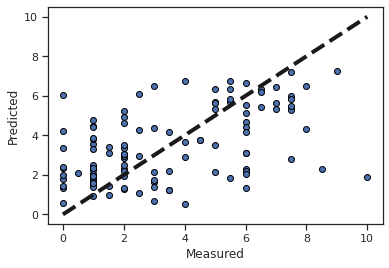

In [ ]:

from sklearn import linear_model

rf = RandomForestRegressor(n_estimators = 10, random_state = 42)





from sklearn import datasets

# boston = datasets.load_boston()
# print(boston)
# print(outcome_var)
predictor_var = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'Male', 'positive_OCB']
outcome_var = 'EDSS_post_10_years'
y = dfMerged[outcome_var]




# dfMerged[outcome_var]

from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(rf, dfMerged[predictor_var], y, cv=10)


fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
# print(__doc__)

# import numpy as np
# import matplotlib.pyplot as plt

# from sklearn import svm, datasets
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import plot_confusion_matrix

# model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features='auto')
# predictor_var = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'Male', 'positive_OCB']
# outcome_var = 'diagnosis_RRMS'

# # Fit the model:
# model.fit(dfMerged[predictor_var], dfMerged[outcome_var])
# # Make predictions on training set:
# predictions = model.predict(dfMerged[predictor_var])
# # Print accuracy

# # Plot non-normalized confusion matrix
# titles_options = [("Confusion matrix, without normalization", None),
#                   ("Normalized confusion matrix", 'true')]
# for title, normalize in titles_options:
#     disp = plot_confusion_matrix(model, X_test, y_test,
#                                  display_labels=class_names,
#                                  cmap=plt.cm.Blues,
#                                  normalize=normalize)
#     disp.ax_.set_title(title)

#     print(title)
#     print(disp.confusion_matrix)

# plt.show()


# # X = dfMerged[predictor_var]
# # y = dfMerged[outcome_var]
# class_names = ['SPMS', 'RRMS']

# # Split the data into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# # # Run classifier, using a model that is too regularized (C too low) to see
# # # the impact on the results
# # classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

# np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# titles_options = [("Confusion matrix, without normalization", None),
#                   ("Normalized confusion matrix", 'true')]
# for title, normalize in titles_options:
#     disp = plot_confusion_matrix(classifier, X_test, y_test,
#                                  display_labels=class_names,
#                                  cmap=plt.cm.Blues,
#                                  normalize=normalize)
#     disp.ax_.set_title(title)

#     print(title)
#     print(disp.confusion_matrix)

# plt.show()

In [ ]:
# def trained_model_to_pickle:
import pickle
rf3 = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features='auto')
predictor_var = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'Male', 'positive_OCB']
outcome_var = 'diagnosis_RRMS'
rf3.fit(dfMerged[predictor_var], dfMerged[outcome_var])

# save the model to disk
filename = 'trained_merged_df_RF_classifier.sav'
pickle.dump(rf3, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

df_input = pd.DataFrame(columns=['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'Male', 'positive_OCB'])
MRI_lesion_mass=640.3
primary_EDSS_at_diagnosis = 3.5
age_at_diagnosis = 50
TIM3_RQ = 0.111 
TIGIT_RQ= 0.222
LAG3_RQ= 0.333
PD1_RQ= 0.444
Male=1
positive_OCB=1
df_input.loc[0] = [MRI_lesion_mass,primary_EDSS_at_diagnosis,age_at_diagnosis,TIM3_RQ,TIGIT_RQ,LAG3_RQ,PD1_RQ,Male,positive_OCB]
# Make predictions on training set:
predictions = loaded_model.predict(df_input[predictor_var])
predictions[0]
# Print accuracy
# accuracy = metrics.accuracy_score(predictions, df_input[outcome_var])
# print("Training accuracy : %s" % "{0:.3%}".format(accuracy))



# result = loaded_model.score(X_test, Y_test)
# print(result)

0

In [ ]:
# def trained_model_to_pickle:
import pickle
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
predictor_var = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'Male', 'positive_OCB']
outcome_var = 'EDSS_post_10_years'
rf.fit(dfMerged[predictor_var], dfMerged[outcome_var])

# save the model to disk
filename = 'trained_merged_df_RF_regressor.sav'
pickle.dump(rf, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

df_input = pd.DataFrame(columns=['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'Male', 'positive_OCB'])
MRI_lesion_mass=640.3
primary_EDSS_at_diagnosis =1
age_at_diagnosis = 50
TIM3_RQ = 0.111 
TIGIT_RQ= 0.222
LAG3_RQ= 0.333
PD1_RQ= 0.444
Male=1
positive_OCB=1
df_input.loc[0] = [MRI_lesion_mass,primary_EDSS_at_diagnosis,age_at_diagnosis,TIM3_RQ,TIGIT_RQ,LAG3_RQ,PD1_RQ,Male,positive_OCB]
# Make predictions on training set:
predictions = loaded_model.predict(df_input[predictor_var])
predictions[0]
# Print accuracy
# accuracy = metrics.accuracy_score(predictions, df_input[outcome_var])
# print("Training accuracy : %s" % "{0:.3%}".format(accuracy))



# result = loaded_model.score(X_test, Y_test)
# print(result)

3.95